In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
import cv2 #computer vision
import matplotlib.pyplot as plt

In [46]:
path1="D:\data set\cnn\CNN dataset\emotion"
cate=['happiness','sadness',]

In [47]:
image_size=70
input_image=[]
for i in cate:
    folders=os.path.join(path1,i)
    label=cate.index(i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        image_array=cv2.resize(image_array,(image_size,image_size))
        input_image.append([image_array,label])

In [48]:
len(input_image)

9945

In [55]:
np.random.shuffle(input_image)

In [56]:
X=[]
Y=[]

for X_values,labels in input_image:
    X.append(X_values)
    Y.append(labels)
    

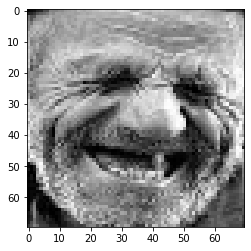

In [57]:
plt.imshow(X[1])

In [58]:
X=np.array(X)
Y=np.array(Y)

In [59]:
X=X/255 

In [60]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.utils.np_utils import to_categorical

In [61]:
model=Sequential()

model.add(Conv2D(filters=264,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=164,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(320,activation='relu',input_shape=X.shape[1:]))
model.add(Dropout(0.25))

model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [62]:
model.fit(X,Y,epochs=20 ,batch_size=164,validation_split=.20)

Epoch 1/20
49/49 [==============================] - 153s 3s/step - loss: 0.8816 - accuracy: 0.5380 - val_loss: 0.6745 - val_accuracy: 0.5400
Epoch 2/20
49/49 [==============================] - 159s 3s/step - loss: 0.6196 - accuracy: 0.6593 - val_loss: 0.5552 - val_accuracy: 0.7285
Epoch 3/20
49/49 [==============================] - 172s 4s/step - loss: 0.5028 - accuracy: 0.7609 - val_loss: 0.5505 - val_accuracy: 0.7134
Epoch 4/20
49/49 [==============================] - 169s 3s/step - loss: 0.4718 - accuracy: 0.7775 - val_loss: 0.4393 - val_accuracy: 0.7873
Epoch 5/20
49/49 [==============================] - 164s 3s/step - loss: 0.4288 - accuracy: 0.8018 - val_loss: 0.4844 - val_accuracy: 0.7592
Epoch 6/20
49/49 [==============================] - 177s 4s/step - loss: 0.4016 - accuracy: 0.8183 - val_loss: 0.4064 - val_accuracy: 0.8175
Epoch 7/20
49/49 [==============================] - 177s 4s/step - loss: 0.3772 - accuracy: 0.8313 - val_loss: 0.3921 - val_accuracy: 0.8140
Epoch 8/20
49

In [63]:
pred=model.predict(X)
pred=np.argmax(pred , axis = 1)
pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [64]:
from sklearn.metrics import *

In [65]:
tab=confusion_matrix(Y,pred)
tab

array([[4297,  263],
       [ 152, 5233]], dtype=int64)

In [66]:
acc=accuracy_score(Y,pred)
acc*100

95.82704876822524

In [67]:

from keras.models import save

In [68]:
model.save("emotion.h5")

In [69]:
#--------------------------------------------------------------------------------------------

In [2]:
import os
import cv2 

In [3]:
from keras.models import load_model
model=load_model('emotion.h5')

In [4]:
results={0:'happy',1:'sad'}
GR_dict={0:(0,255,0),1:(255,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0)
haarcascade=cv2.CascadeClassifier(r"D:\data set\Harcascade\haarcascade_frontalface_alt.xml")
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(70,70))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,70,70,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        
        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)

    cv2.imshow('Liv Camera',   im)
    key = cv2.waitKey(10)
    if key == 27: # use the escape key
        break

cap.release()

cv2.destroyAllWindows()

